In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [3]:
df = pd.read_pickle("incident_plus_weather.pkl")

In [5]:
def plot_count_vs_cat(var='Arrond', ymin=0, ymax=None, plot_width=15, plot_height=12):
    data = pd.concat([df['count'], df[var]], axis=1)
    f, ax = plt.subplots(figsize=(plot_width, plot_height))
    fig = sns.boxplot(x=var, y='count', data=data)
    fig.axis(ymin=ymin, ymax=ymax);

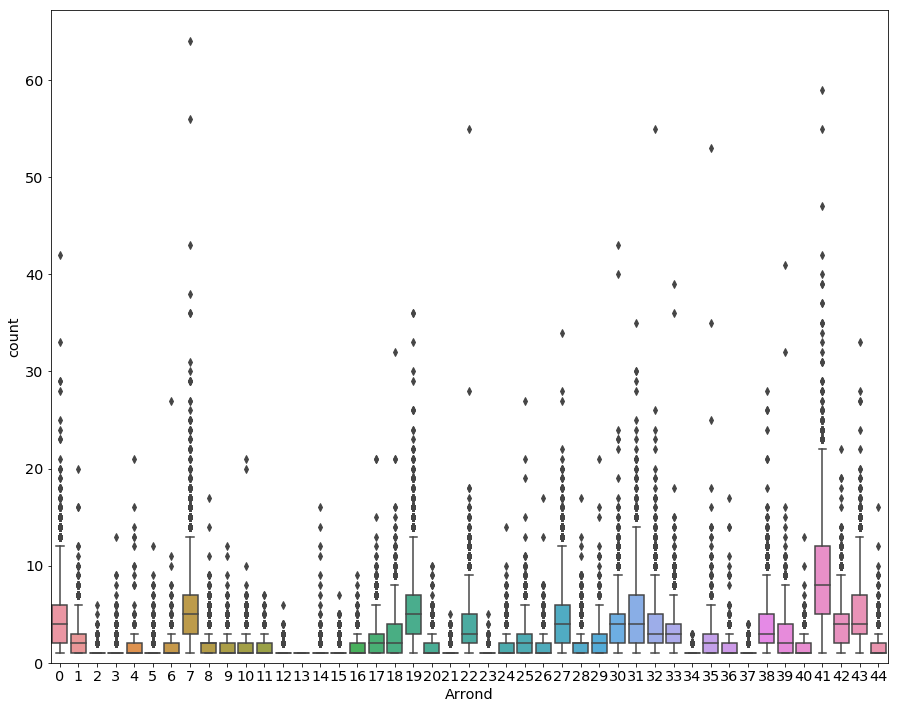

In [6]:
plot_count_vs_cat('Arrond')
plt.savefig('count_arrond.png')

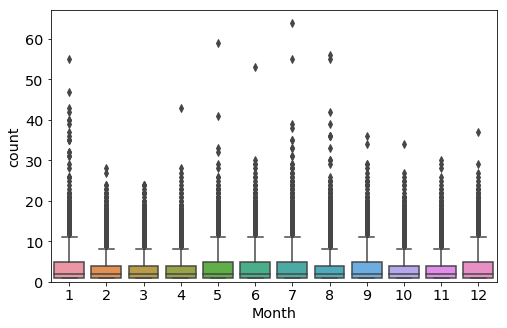

In [7]:
plot_count_vs_cat('Month', plot_width=8, plot_height=5)
plt.savefig('count_month.png')

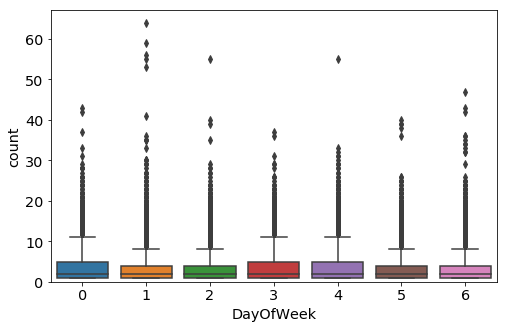

In [8]:
plot_count_vs_cat('DayOfWeek', plot_width=8, plot_height=5)
plt.savefig('count_dayofweek.png')

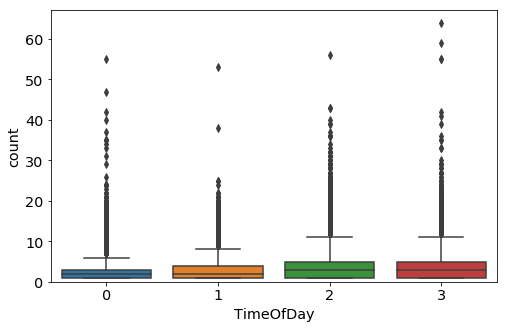

In [9]:
plot_count_vs_cat('TimeOfDay', plot_width=8, plot_height=5)
plt.savefig('count_timeofday.png')

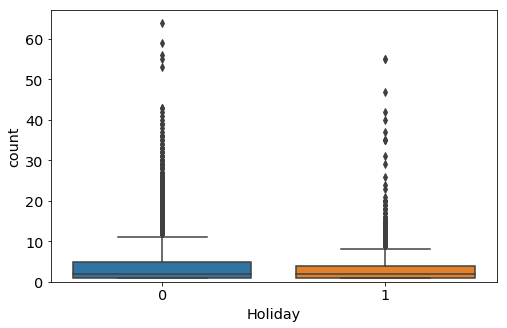

In [10]:
plot_count_vs_cat('Holiday', plot_width=8, plot_height=5)
plt.savefig('count_holidays.png')

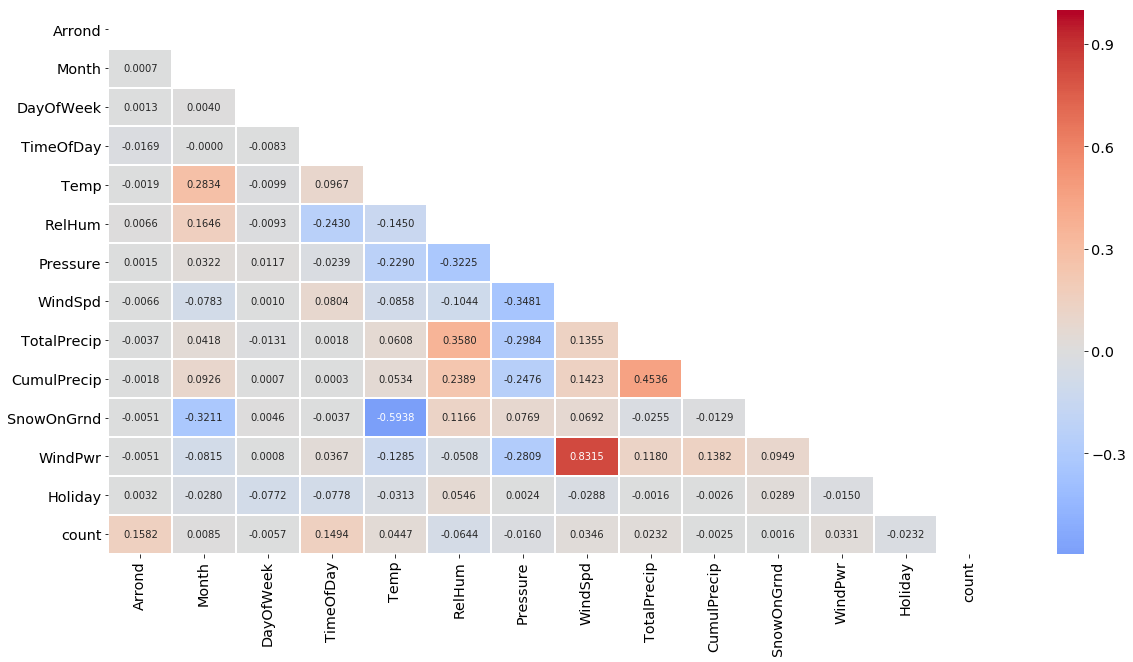

In [11]:
# new wind power
cmap = cmap='coolwarm'
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), mask=mask, center=0, cmap=cmap, linewidths=1, annot=True, fmt=".4f")
plt.savefig('correlations.png')

In [12]:
df2 = pd.read_pickle("incident_plus_weather.pkl")

In [13]:
# Determine whether there is an above average number of calls (more than 5) per time period. False =1, True =1
def call_bucket (row):
   if row['count'] >=0 and row['count']<=5 :
      return 0
   if row['count'] > 5 :
      return 1
   return -1

# Creation new column for the hour bin/bucket and apply the previously created function to generate its values
df2['BusyDay'] = df2.apply (lambda row: call_bucket(row), axis=1)

In [16]:
df2

,Arrond,Month,DayOfWeek,TimeOfDay,Temp,RelHum,Pressure,WindSpd,TotalPrecip,CumulPrecip,SnowOnGrnd,WindPwr,Holiday,count,BusyDay
0,0,1,0,0,0.001918,0.468750,0.784973,0.143617,0.000000,0.021382,0.170213,0.003239,0,3,0
1,0,1,0,0,0.053973,0.605469,0.751359,0.175532,0.000000,0.139803,0.382979,0.005827,1,5,0
2,0,1,0,0,0.076986,0.785156,0.997034,0.146277,0.000000,0.316612,0.553191,0.003407,0,2,0
3,0,1,0,0,0.090685,0.550781,0.765942,0.119681,0.000000,0.019737,0.340426,0.001832,0,3,0
4,0,1,0,0,0.108493,0.695312,0.501730,0.265957,0.014905,0.097862,0.361702,0.019673,0,4,0
5,0,1,0,0,0.110411,0.619141,0.717746,0.223404,0.000000,0.062500,0.170213,0.011823,0,5,0
6,0,1,0,0,0.113425,0.384766,0.776817,0.204787,0.000000,0.034539,0.127660,0.009136,0,1,0
7,0,1,0,0,0.117808,0.669922,0.858379,0.135638,0.000000,0.004112,0.382979,0.002666,0,7,1
8,0,1,0,0,0.133973,0.611328,0.848987,0.087766,0.000000,0.215461,0.297872,0.000719,0,7,1
9,0,1,0,0,0.136986,0.613281,0.652002,0.093085,0.000000,0.001645,0.276596,0.000846,0,1,0


In [ ]:
Pressure 	WindSpd 	TotalPrecip 	CumulPrecip 	SnowOnGrnd 	WindPwr

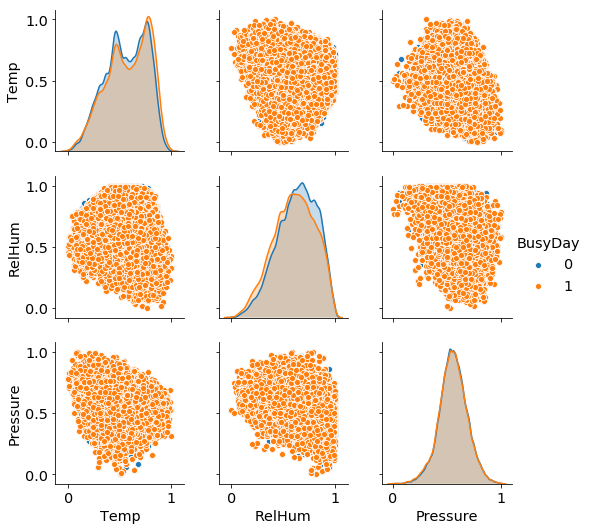

In [26]:
g = sns.pairplot(df2, hue='BusyDay', vars=['Temp', 'RelHum','Pressure'])
plt.savefig('pairplot_1.png')

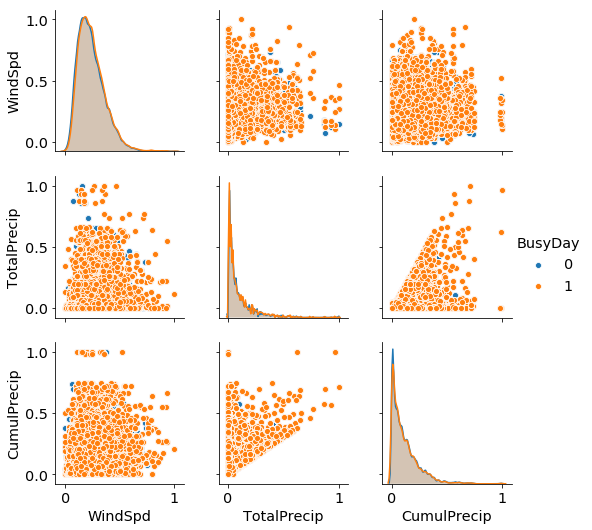

In [27]:
g = sns.pairplot(df2, hue='BusyDay', vars=['WindSpd', 'TotalPrecip','CumulPrecip'])
plt.savefig('pairplot_2.png')

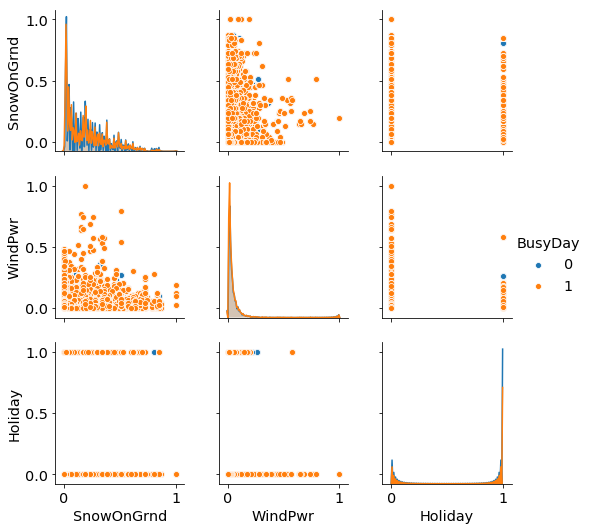

In [28]:
g = sns.pairplot(df2, hue='BusyDay', vars=['SnowOnGrnd', 'WindPwr','Holiday'])
plt.savefig('pairplot_3.png')

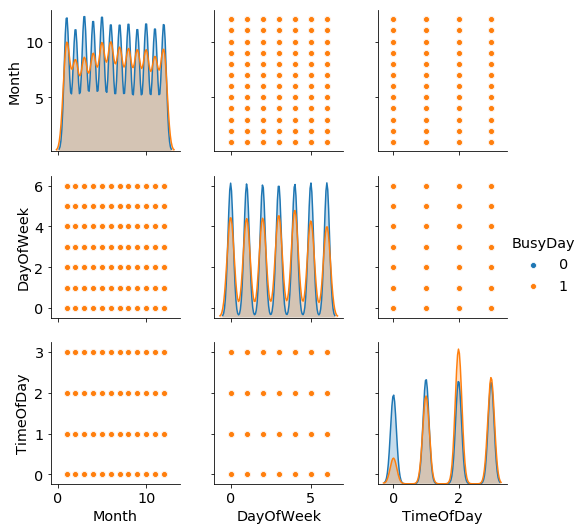

In [29]:
g = sns.pairplot(df2, hue='BusyDay', vars=['Month', 'DayOfWeek','TimeOfDay'])
plt.savefig('pairplot_4.png')